In [1]:
import numpy as np
import pandas as pd

In [2]:
df3 = pd.read_csv("delhi_cases.csv",parse_dates=["Date"])

In [3]:
corr_sixteen_df = pd.DataFrame(df3, columns=['Date','Confirmed','Sixteen'])

In [4]:
corr_sixteen_df.head()

,Date,Confirmed,Sixteen
0,2020-02-03,1,1.0
1,2020-03-03,1,1.0
2,2020-04-03,1,1.0
3,2020-05-03,2,1.0
4,2020-06-03,3,1.0


In [5]:
corr_sixteen_df["Confirmed"]=corr_sixteen_df["Confirmed"].astype("float64")

In [6]:
df_droppednan_16 = corr_sixteen_df.dropna()

In [7]:
import scipy.stats as stats
import scipy.stats

In [8]:
pearsonr_x = df_droppednan_16["Confirmed"]
pearsonr_y = df_droppednan_16["Sixteen"]

In [9]:
scipy.stats.pearsonr(pearsonr_x, pearsonr_y)

(0.9600291534328094, 4.254359706844949e-67)

In [10]:
scipy.stats.spearmanr(pearsonr_x, pearsonr_y)

SpearmanrResult(correlation=0.9995258647857352, pvalue=3.149245589860394e-180)

In [11]:
scipy.stats.kendalltau(pearsonr_x, pearsonr_y) 

KendalltauResult(correlation=0.9942984269564948, pvalue=1.3200596140508091e-57)

In [12]:
result = scipy.stats.linregress(pearsonr_x, pearsonr_y)
result.slope

0.05316288083030948

In [13]:
result.intercept

91.63735719310034

In [14]:
result.rvalue

0.9600291534328095

In [15]:
result.pvalue

4.254359706844348e-67

In [16]:
result.stderr

0.0014268753008029316

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [18]:
line = f'Regression line: y={result.intercept:.2f}+{result.slope:.2f}x, r={result.rvalue:.2f}'

In [19]:
line

'Regression line: y=91.64+0.05x, r=0.96'

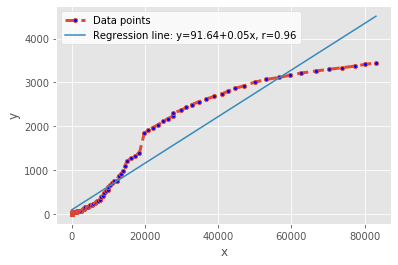

In [20]:
fig, ax = plt.subplots()
ax.plot(pearsonr_x, pearsonr_y,linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=4, label='Data points')
ax.plot(pearsonr_x, result.intercept + result.slope * pearsonr_x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()